In [ ]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv1D, GlobalAveragePooling2D
from tensorflow.keras.layers import Conv1D, BatchNormalization
from tensorflow.keras.layers import ReLU, AvgPool1D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.optimizers.legacy import Adam

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/GLCM_all.csv")

In [ ]:
LEncoder = LabelEncoder()

df['label'] = LEncoder.fit_transform(df['label'])

In [ ]:
X = df.drop('label',axis=1).values
y = df['label'].values

In [ ]:
random_state = 42

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=random_state)

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8248, 25) (2063, 25) (8248,) (2063,)


In [ ]:
#reshape image
X_train = X_train.reshape(8248,25,1)
X_test = X_test.reshape(2063,25,1)


#X_train = np.expand_dims(X_train , 0),X_test = np.expand_dims(X_test , 0)

In [ ]:
X_test.shape

(2063, 25, 1)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Pre-Modeling Tasks

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Modeling

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# Evaluation and comparision of all the models

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import roc_auc_score,auc,f1_score
from sklearn.metrics import precision_recall_curve,roc_curve

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [ ]:
# Logistic Regression


logreg= LogisticRegression()

logreg.fit(X_train, y_train)

y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()

GB.fit(X_train, y_train)

y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier()

XGB.fit(X_train, y_train)

y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)

svc.fit(X_train,y_train)

y_pred_svc = svc.predict(X_test)

In [ ]:
models = []

Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()]


X = ["SVC" , "DecisionTreeClassifier" , "LogisticRegression" , "KNeighborsClassifier" ,
    "RandomForestClassifier" , "GradientBoostingClassifier", "XGB"]

for i in range(0,len(Z)):
    model = Z[i]
    model.fit( X_train , y_train )
    pred = model.predict(X_test)
    models.append(accuracy_score(pred , y_test))



d = { "Accuracy" : models , "Algorithm" : X }
data_frame = pd.DataFrame(d)
data_frame

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Algorithm
0,0.934077,SVC
1,0.999515,DecisionTreeClassifier
2,0.908386,LogisticRegression
3,0.915172,KNeighborsClassifier
4,0.999515,RandomForestClassifier
5,0.977218,GradientBoostingClassifier
6,0.999515,XGB


SEQUENTIAL MODEL


In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
X_train = X_train.reshape(8248,25,1)
X_test = X_test.reshape(2063,25,1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 23, 16)            64        
                                                                 
 batch_normalization (BatchN  (None, 23, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            1568      
                                                                 
 batch_normalization_1 (Batc  (None, 21, 32)           128       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 21, 32)            0

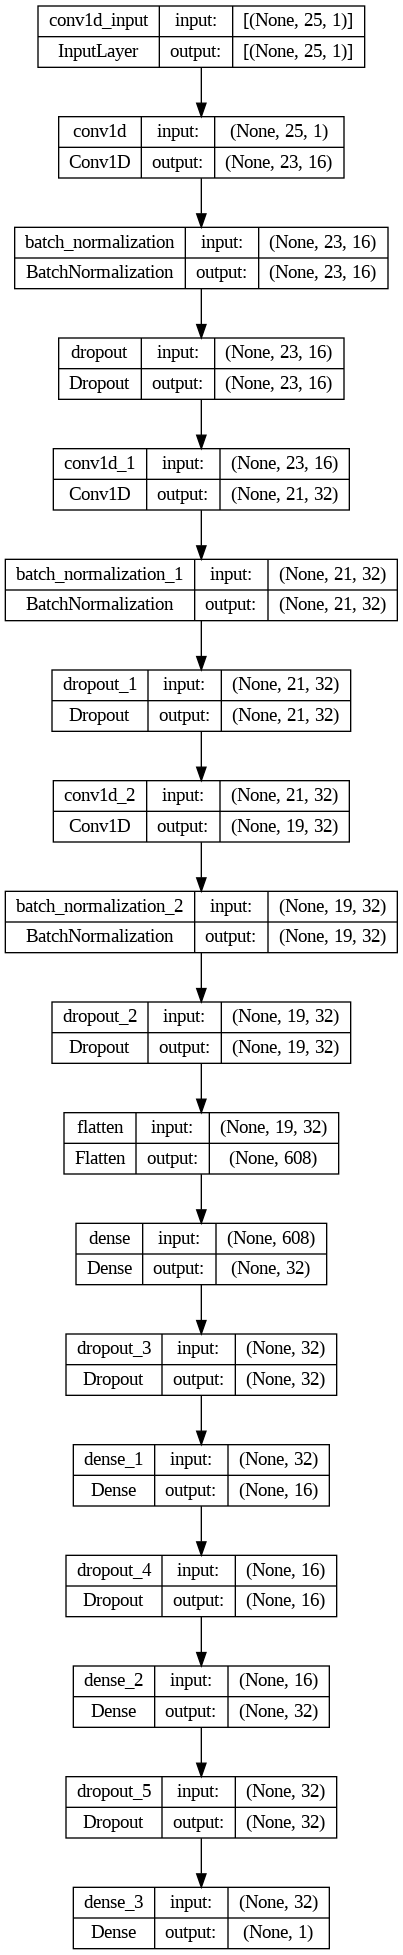

In [ ]:
mod = Sequential()
mod.add(Conv1D(filters=16,kernel_size=3,activation='relu',input_shape=(25,1)))
mod.add(BatchNormalization())
mod.add(Dropout(0.2))

mod.add(Conv1D(32,3,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.2))

mod.add(Conv1D(32,3,activation='relu'))
mod.add(BatchNormalization())
mod.add(Dropout(0.2))

mod.add(Flatten())

mod.add(Dense(32,activation='relu'))
mod.add(Dropout(0.2))

mod.add(Dense(16,activation='relu'))
mod.add(Dropout(0.2))

mod.add(Dense(32,activation='relu'))
mod.add(Dropout(0.2))

mod.add(Dense(1,activation='sigmoid'))

mod.summary()

tf.keras.utils.plot_model(mod, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import brier_score_loss

import keras.backend as K


def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
mod.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy','Precision',f1_score,'Recall','AUC'])

In [ ]:
history = mod.fit(X_train,y_train,epochs=30,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
258/258 [==============================] - 22s 43ms/step - loss: 0.5526 - accuracy: 0.7031 - precision: 0.7045 - f1_score: 0.7179 - recall: 0.7563 - auc: 0.7794 - val_loss: 0.2569 - val_accuracy: 0.9268 - val_precision: 0.8851 - val_f1_score: 0.9324 - val_recall: 0.9859 - val_auc: 0.9422
Epoch 2/30
258/258 [==============================] - 6s 23ms/step - loss: 0.2748 - accuracy: 0.9097 - precision: 0.8779 - f1_score: 0.9169 - recall: 0.9634 - auc: 0.9361 - val_loss: 0.1849 - val_accuracy: 0.9418 - val_precision: 0.9006 - val_f1_score: 0.9461 - val_recall: 0.9972 - val_auc: 0.9545
Epoch 3/30
258/258 [==============================] - 5s 18ms/step - loss: 0.2284 - accuracy: 0.9263 - precision: 0.8906 - f1_score: 0.9319 - recall: 0.9812 - auc: 0.9480 - val_loss: 0.1935 - val_accuracy: 0.9336 - val_precision: 0.8878 - val_f1_score: 0.9396 - val_recall: 0.9972 - val_auc: 0.9589
Epoch 4/30
258/258 [==============================] - 3s 11ms/step - loss: 0.2111 - accuracy: 0.9326 -

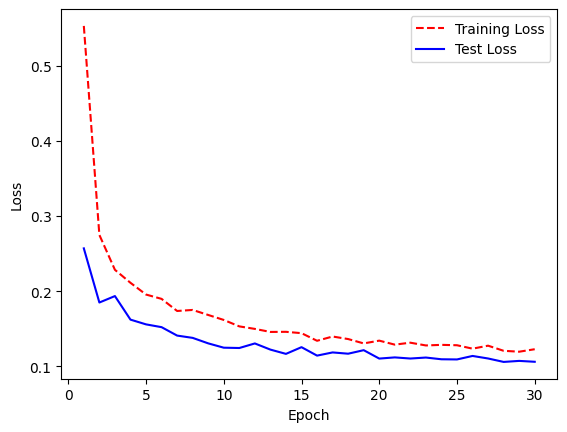

In [ ]:

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

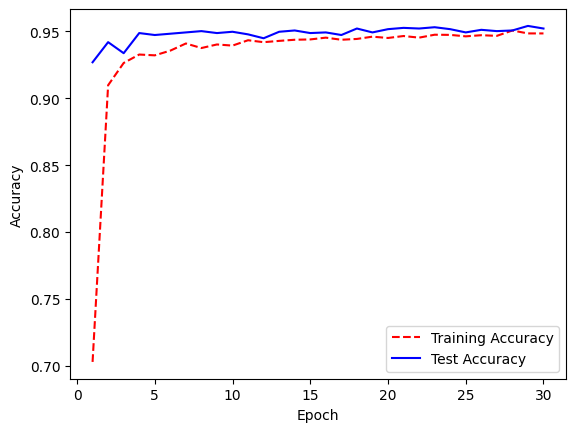

In [ ]:
# Get training and test accuracy histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
from sklearn.svm import SVC

from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import make_pipeline

from sklearn.metrics import roc_curve, auc

from sklearn.multiclass import OneVsOneClassifier

from scipy import interp

from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import brier_score_loss

import keras.backend as K


In [ ]:
import keras
layer_name = 'dense_3'
intermediate_layer_model = keras.Model(inputs=mod.input,
                                       outputs=mod.get_layer(layer_name).output)
intermediate_layer_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_input (InputLayer)   [(None, 25, 1)]           0         
                                                                 
 conv1d (Conv1D)             (None, 23, 16)            64        
                                                                 
 batch_normalization (BatchN  (None, 23, 16)           64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 23, 16)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 21, 32)            1568      
                                                                 
 batch_normalization_1 (Batc  (None, 21, 32)           128       
 hNormalization)                                             

In [ ]:
"""import keras
layer_name = 'dense_21'
intermediate_layer_model = keras.Model(inputs=mod.input,
                                       outputs=mod.get_layer(layer_name).output)
intermediate_layer_model.summary()"""
y_train_pred = intermediate_layer_model.predict(X_train)
y_valid_pred = intermediate_layer_model.predict(X_test)

65/65 [==============================] - 0s 3ms/step


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import brier_score_loss
from sklearn.metrics import confusion_matrix


In [ ]:
print("for SVC")

y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf = make_pipeline(StandardScaler(),SVC(probability=True))
clf = OneVsOneClassifier(clf)
y_score = clf.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score[i]<0 :
    y_score[i] = 0
  else:
    y_score[i]= 1

acc = accuracy_score(y_test,y_score)
pre=precision_score(y_test,y_score)
f1= f1_score(y_test,y_score)
roc = roc_auc_score(y_test,y_score)
recall= recall_score(y_test,y_score)
loss=brier_score_loss(y_test,y_score)

print('Confusion matrix',confusion_matrix(y_test,y_score))

print(acc,pre,f1,roc,recall,loss)


for SVC
Confusion matrix [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


In [ ]:
# Logistic Regression
print("For Logistic Regression")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),LogisticRegression())
clf1 = OneVsOneClassifier(clf)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1

acc = accuracy_score(y_test,y_score)
pre=precision_score(y_test,y_score)
f1= f1_score(y_test,y_score)
roc = roc_auc_score(y_test,y_score)
recall= recall_score(y_test,y_score)
loss=brier_score_loss(y_test,y_score)

print('Confusion matrix\n',confusion_matrix(y_test,y_score))

print(acc,pre,f1,roc,recall,loss)


For Logistic Regression
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


In [ ]:
# KNN
print("for KNN")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf3 = make_pipeline(StandardScaler(),KNeighborsClassifier())
clf3 = OneVsOneClassifier(clf)
y_score_knn = clf3.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_knn[i]<0 :
    y_score_knn[i] = 0
  else:
    y_score_knn[i]= 1

acc = accuracy_score(y_test,y_score_knn)
pre=precision_score(y_test,y_score_knn)
f1= f1_score(y_test,y_score_knn)
roc = roc_auc_score(y_test,y_score_knn)
recall= recall_score(y_test,y_score_knn)
loss=brier_score_loss(y_test,y_score_knn)

print('Confusion matrix\n',confusion_matrix(y_test,y_score_knn))

print(acc,pre,f1,roc,recall,loss)

for KNN
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435




Z = [SVC() , DecisionTreeClassifier() , LogisticRegression() , KNeighborsClassifier() ,XGBClassifier(),
    RandomForestClassifier() , GradientBoostingClassifier()




In [ ]:
# Descision tree
print("for Descition tree")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf3 = make_pipeline(StandardScaler(),DecisionTreeClassifier())
clf3 = OneVsOneClassifier(clf)
y_score_dt = clf3.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_dt[i]<0 :
    y_score_dt[i] = 0
  else:
    y_score_dt[i]= 1

acc = accuracy_score(y_test,y_score_dt)
pre=precision_score(y_test,y_score_dt)
f1= f1_score(y_test,y_score_dt)
roc = roc_auc_score(y_test,y_score_dt)
recall= recall_score(y_test,y_score_dt)
loss=brier_score_loss(y_test,y_score_dt)

print('Confusion matrix\n',confusion_matrix(y_test,y_score_dt))

print(acc,pre,f1,roc,recall,loss)

for Descition tree
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


In [ ]:
# XGB
print("for XGB")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf3 = make_pipeline(StandardScaler(), XGBClassifier())
clf3 = OneVsOneClassifier(clf)
y_score_XGB = clf3.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_XGB[i]<0 :
    y_score_XGB[i] = 0
  else:
    y_score_XGB[i]= 1

acc = accuracy_score(y_test,y_score_XGB)
pre=precision_score(y_test,y_score_XGB)
f1= f1_score(y_test,y_score_XGB)
roc = roc_auc_score(y_test,y_score_XGB)
recall= recall_score(y_test,y_score_XGB)
loss=brier_score_loss(y_test,y_score_XGB)

print('Confusion matrix\n',confusion_matrix(y_test,y_score_XGB))

print(acc,pre,f1,roc,recall,loss)

for XGB
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


In [ ]:
# RandomForestClassifier
print("random forest")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf3 = make_pipeline(StandardScaler(),RandomForestClassifier())
clf3 = OneVsOneClassifier(clf)
y_score_RandomForestClassifier = clf3.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_RandomForestClassifier[i]<0 :
    y_score_RandomForestClassifier[i] = 0
  else:
    y_score_RandomForestClassifier[i]= 1

acc = accuracy_score(y_test,y_score_RandomForestClassifier)
pre=precision_score(y_test,y_score_RandomForestClassifier)
f1= f1_score(y_test,y_score_RandomForestClassifier)
roc = roc_auc_score(y_test,y_score_RandomForestClassifier)
recall= recall_score(y_test,y_score_RandomForestClassifier)
loss=brier_score_loss(y_test,y_score_RandomForestClassifier)

print('Confusion matrix\n',confusion_matrix(y_test,y_score_RandomForestClassifier))

print(acc,pre,f1,roc,recall,loss)

random forest
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


In [ ]:
# GradientBoostingClassifier
print("for GradientBoostingClassifier")
#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf3 = make_pipeline(StandardScaler(),GradientBoostingClassifier())
clf3 = OneVsOneClassifier(clf)
y_score_GradientBoostingClassifier = clf3.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_GradientBoostingClassifier[i]<0 :
    y_score_GradientBoostingClassifier[i] = 0
  else:
    y_score_GradientBoostingClassifier[i]= 1

acc = accuracy_score(y_test,y_score_GradientBoostingClassifier)
pre=precision_score(y_test,y_score_GradientBoostingClassifier)
f1= f1_score(y_test,y_score_GradientBoostingClassifier)
roc = roc_auc_score(y_test,y_score_GradientBoostingClassifier)
recall= recall_score(y_test,y_score_GradientBoostingClassifier)
loss=brier_score_loss(y_test,y_score_GradientBoostingClassifier)

print('Confusion matrix\n',confusion_matrix(y_test,y_score_GradientBoostingClassifier))

print(acc,pre,f1,roc,recall,loss)

for GradientBoostingClassifier
Confusion matrix
 [[ 904   96]
 [   6 1057]]
0.9505574406204557 0.9167389418907199 0.9539711191335741 0.9491777986829728 0.9943555973659455 0.04944255937954435


MOBILENET MODEL

In [ ]:
X_train = X_train.reshape(8248,25,1,1)
X_test = X_test.reshape(2063,25,1,1)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1, 1)]        0         
                                                                 
 conv2d (Conv2D)             (None, 13, 1, 32)         320       
                                                                 
 batch_normalization_3 (Batc  (None, 13, 1, 32)        128       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 13, 1, 32)         0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 13, 1, 32)        320       
 Conv2D)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 13, 1, 32)        128 

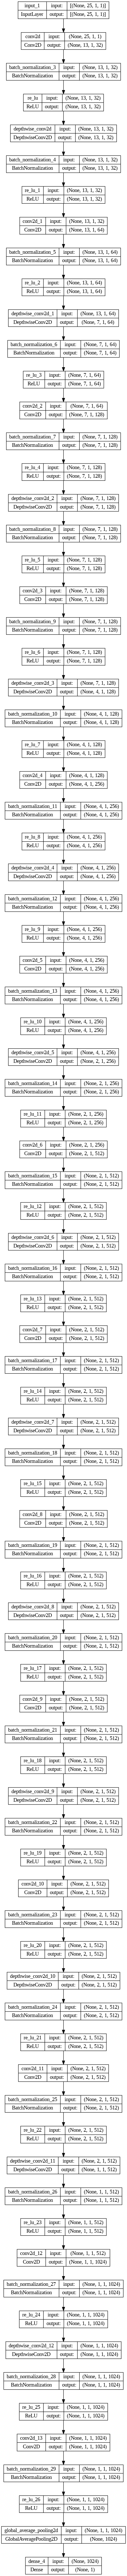

In [ ]:
import tensorflow as tf
#import all necessary layers
from tensorflow.keras.layers import Input, DepthwiseConv2D
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import ReLU,GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras import Model
# MobileNet block
def mobilnet_block (x, filters, strides):

    x = DepthwiseConv2D(kernel_size = 3, strides = strides, padding = 'same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    x = Conv2D(filters = filters, kernel_size = 1, strides = 1)(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)

    return x
#stem of the model
input = Input(shape = (25,1,1))
x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(input)
x = BatchNormalization()(x)
x = ReLU()(x)
# main part of the model
x = mobilnet_block(x, filters = 64, strides = 1)
x = mobilnet_block(x, filters = 128, strides = 2)
x = mobilnet_block(x, filters = 128, strides = 1)
x = mobilnet_block(x, filters = 256, strides = 2)
x = mobilnet_block(x, filters = 256, strides = 1)
x = mobilnet_block(x, filters = 512, strides = 2)
for _ in range (5):
     x = mobilnet_block(x, filters = 512, strides = 1)
x = mobilnet_block(x, filters = 1024, strides = 2)
x = mobilnet_block(x, filters = 1024, strides = 1)
x = GlobalAveragePooling2D()(x)

output = Dense (units = 1, activation = 'sigmoid')(x)
model = Model(inputs=input, outputs=output)
model.summary()
#plot the model
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False,show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
import keras.backend as K


def f1_score(y_true, y_pred):
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy','Precision',f1_score,'Recall','AUC'])

In [ ]:
history = model.fit(X_train,y_train,epochs=30,verbose=1,validation_data=(X_test,y_test))

Epoch 1/30
258/258 [==============================] - 110s 374ms/step - loss: 0.3998 - accuracy: 0.8333 - precision: 0.8152 - f1_score: 0.8473 - recall: 0.8859 - auc: 0.8987 - val_loss: 0.7032 - val_accuracy: 0.4847 - val_precision: 0.0000e+00 - val_f1_score: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.5000
Epoch 2/30
258/258 [==============================] - 96s 372ms/step - loss: 0.2151 - accuracy: 0.9211 - precision: 0.8956 - f1_score: 0.9264 - recall: 0.9631 - auc: 0.9658 - val_loss: 0.7124 - val_accuracy: 0.5153 - val_precision: 0.5153 - val_f1_score: 0.6759 - val_recall: 1.0000 - val_auc: 0.5000
Epoch 3/30
258/258 [==============================] - 95s 370ms/step - loss: 0.1763 - accuracy: 0.9347 - precision: 0.9057 - f1_score: 0.9387 - recall: 0.9785 - auc: 0.9764 - val_loss: 0.2933 - val_accuracy: 0.9312 - val_precision: 0.8854 - val_f1_score: 0.9371 - val_recall: 0.9953 - val_auc: 0.9765
Epoch 4/30
258/258 [==============================] - 96s 371ms/step - loss: 0.1631 

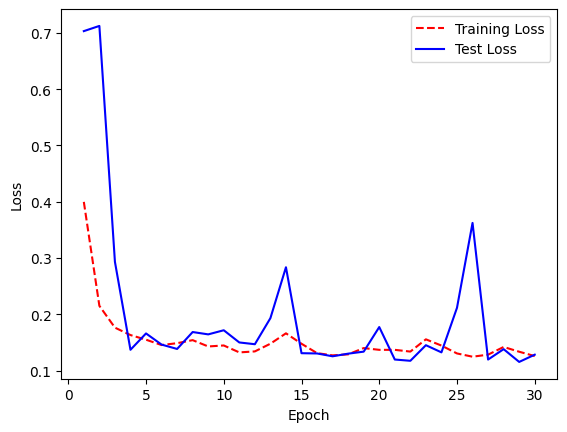

In [ ]:
# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

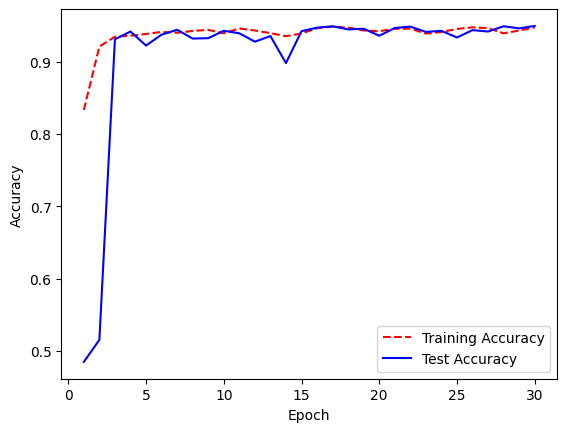

In [ ]:
# Get training and test accuracy histories
training_loss = history.history['accuracy']
test_loss = history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [ ]:
# Logistic Regression


logreg= LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)


# Gradient Boosting Classifier


GB = GradientBoostingClassifier()
GB.fit(X_train, y_train)
y_pred_GB = GB.predict(X_test)



# Random Forest Classifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)


# KNeighbors Classifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


# XGB Classifier

XGB = XGBClassifier()
XGB.fit(X_train, y_train)
y_pred_XGB = XGB.predict(X_test)



# Support Vector classifier

svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(8248, 25) (2063, 25) (8248,) (2063,)


In [ ]:
print(y_test)

[0 1 0 ... 1 0 1]


In [ ]:
X_train = X_train.reshape(8248,25,1)
X_test = X_test.reshape(2063,25,1)

In [ ]:
import keras
layer_name = 'dense_4'
intermediate_layer_model = keras.Model(inputs=model.input,
                                       outputs=model.get_layer(layer_name).output)
intermediate_layer_model.summary()
y_train_pred = intermediate_layer_model.predict(X_train)
y_valid_pred = intermediate_layer_model.predict(X_test)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 25, 1, 1)]        0         
                                                                 
 conv2d (Conv2D)             (None, 13, 1, 32)         320       
                                                                 
 batch_normalization_3 (Batc  (None, 13, 1, 32)        128       
 hNormalization)                                                 
                                                                 
 re_lu (ReLU)                (None, 13, 1, 32)         0         
                                                                 
 depthwise_conv2d (Depthwise  (None, 13, 1, 32)        320       
 Conv2D)                                                         
                                                                 
 batch_normalization_4 (Batc  (None, 13, 1, 32)        128 

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(x_train)
X_test= sc.transform(x_test)

In [ ]:
print("for SVC")

y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf = make_pipeline(StandardScaler(),SVC(probability=True))
clf = OneVsOneClassifier(clf)
y_score = clf.fit(y_train_pred, y_train).decision_function(y_valid_pred)

print(y_score)

for i in range(2063):
  if y_score[i]<0 :
    y_score[i] = int(0)
  else:
    y_score[i] = int(1)


print(y_test)
print(y_score)
acc = accuracy_score(y_test,y_score)
pre=precision_score(y_test,y_score)
#f1= f1_score(y_test,y_score)
roc = roc_auc_score(y_test,y_score)
recall= recall_score(y_test,y_score)
loss=brier_score_loss(y_test,y_score)

print('Confusion matrix',confusion_matrix(y_test,y_score))

print(acc,pre,f1,roc,recall,loss)

for SVC
[-0.19262811  1.16674839 -0.19236756 ...  1.16806603 -0.19257878
  1.16909835]
[0 1 0 ... 1 0 1]
[0. 1. 0. ... 1. 0. 1.]
Confusion matrix [[ 898  102]
 [   2 1061]]
0.9495879786718371 0.9122957867583835 0.9539711191335741 0.9480592662276577 0.9981185324553151 0.050412021328162866


In [ ]:
# Logistic Regression

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),LogisticRegression())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1

print('Confusion matrix\n',confusion_matrix(y_test,y_score_lr))
acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
#f1= f1_score(y_test,y_score_lr)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[ 913   87]
 [  36 1027]]
0.9403780901599612 0.921903052064632 0.9539711191335741 0.9395667920978363 0.9661335841956726 0.059621909840038775


In [ ]:
# GradientBoostingClassifier

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),GradientBoostingClassifier())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1
print('Confusion matrix\n',confusion_matrix(y_test,y_score_lr))
acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
#f1= f1_score(y_test,y_score_lr)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[ 903   97]
 [  17 1046]]
0.9447406689287445 0.9151356080489939 0.9539711191335741 0.9435037629350893 0.9840075258701787 0.055259331071255455


In [ ]:
# RandomForestClassifier

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),RandomForestClassifier())
clf1 = OneVsOneClassifier(clf1)
y_score = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score[i]<0 :
    y_score[i] = 0
  else:
    y_score[i]= 1
print('Confusion matrix\n',confusion_matrix(y_test,y_score))
acc = accuracy_score(y_test,y_score)
pre=precision_score(y_test,y_score)
#f1= f1_score(y_test,y_score)
roc = roc_auc_score(y_test,y_score)
recall= recall_score(y_test,y_score)
loss=brier_score_loss(y_test,y_score)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[   0 1000]
 [   0 1063]]
0.5152690256907416 0.5152690256907416 0.9539711191335741 0.5 1.0 0.4847309743092584


In [ ]:
# DecisionTreeClassifiern

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),DecisionTreeClassifier())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1

print('Confusion matrix\n',confusion_matrix(y_test,y_score_lr))
acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
#f1= f1_score(y_test,y_score_lr)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[   0 1000]
 [   0 1063]]
0.5152690256907416 0.5152690256907416 0.9539711191335741 0.5 1.0 0.4847309743092584


In [ ]:
# KNeighborsClassifier

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(), KNeighborsClassifier())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1

print('Confusion matrix\n',confusion_matrix(y_test,y_score_lr))
acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
#f1= f1_score(y_test,y_score_lr)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[   0 1000]
 [   0 1063]]
0.5152690256907416 0.5152690256907416 0.9539711191335741 0.5 1.0 0.4847309743092584


In [ ]:
# XGBClassifier

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(),XGBClassifier())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1
print('Confusion matrix\n',confusion_matrix(y_test,y_score_lr))
acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
#f1= f1_score(y_test,y_score_lr)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

Confusion matrix
 [[   0 1000]
 [   0 1063]]
0.5152690256907416 0.5152690256907416 0.9539711191335741 0.5 1.0 0.4847309743092584


In [ ]:
# SVC

#y_val = label_binarize(y_test, classes=[0,1])
# classifier
clf1 = make_pipeline(StandardScaler(), SVC())
clf1 = OneVsOneClassifier(clf1)
y_score_lr = clf1.fit(y_train_pred, y_train).decision_function(y_valid_pred)

for i in range(2063):
  if y_score_lr[i]<0 :
    y_score_lr[i] = 0
  else:
    y_score_lr[i]= 1

acc = accuracy_score(y_test,y_score_lr)
pre=precision_score(y_test,y_score_lr)
f1= f1_score(y_test,y_score)
roc = roc_auc_score(y_test,y_score_lr)
recall= recall_score(y_test,y_score_lr)
loss=brier_score_loss(y_test,y_score_lr)
print(acc,pre,f1,roc,recall,loss)

0.9471643238002908 0.9097938144329897 0.6801023672424824 0.9456185324553151 0.9962370649106302 0.052835676199709164


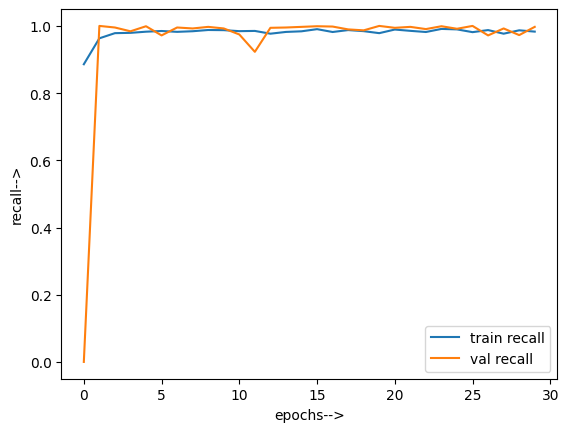

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot recall
plt.plot(history.history['recall'], label='train recall')
plt.plot(history.history['val_recall'], label='val recall')
plt.legend()
plt.xlabel('epochs-->')
plt.ylabel('recall-->')
plt.show()
plt.savefig('AccVal_rec')

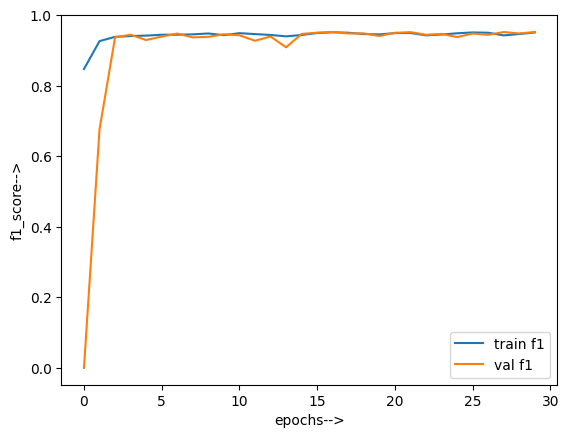

<Figure size 640x480 with 0 Axes>

In [ ]:
#plot f1_score
plt.plot(history.history['f1_score'], label='train f1')
plt.plot(history.history['val_f1_score'], label='val f1')
plt.legend()
plt.xlabel('epochs-->')
plt.ylabel('f1_score-->')
plt.show()
plt.savefig('AccVal_f1')

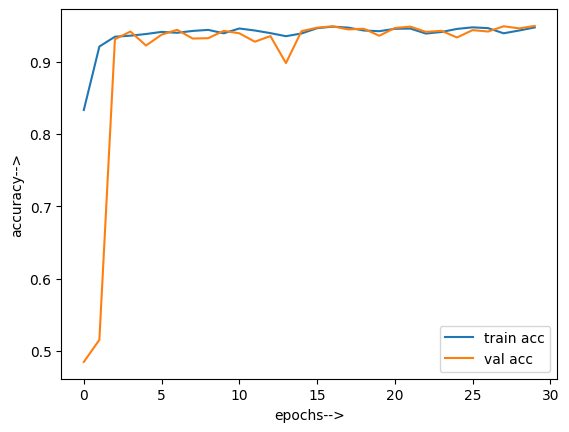

<Figure size 640x480 with 0 Axes>

In [ ]:
# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.xlabel('epochs-->')
plt.ylabel('accuracy-->')
plt.show()
plt.savefig('AccVal_acc')

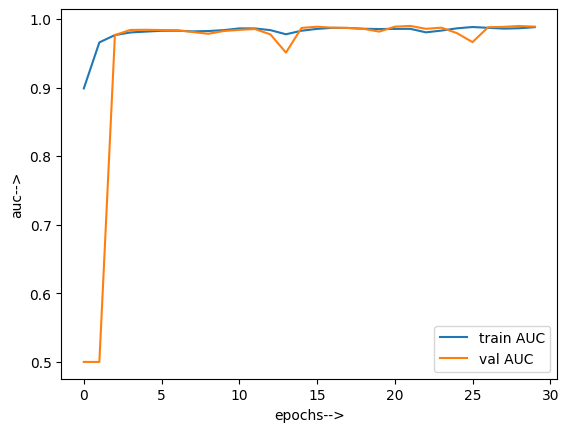

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['auc'], label='train AUC')
plt.plot(history.history['val_auc'], label='val AUC')
plt.legend()
plt.xlabel('epochs-->')
plt.ylabel('auc-->')
plt.show()
plt.savefig('AUCVal_AUC')